In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import csv
import selenium
import re
import pymongo

In [42]:
artists = pd.read_csv("artists-data.csv")
lyrics = pd.read_csv("lyrics-data.csv")

In [43]:
lyrics

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [44]:
artists

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/
...,...,...,...,...,...
4163,Miriam Makeba,World Music; Black Music; Blues,17.0,0.0,/miriam-makeba/
4164,Freddie Aguilar,World Music,61.0,0.0,/freddie-aguilar/
4165,Amadou & Mariam,World Music,14.0,0.0,/amadou-mariam/
4166,Magic System,World Music; Gospel/Religioso,16.0,0.0,/magic-system/


In [45]:
lyrics.rename(columns = {'ALink':'Link'}, inplace = True)
lyrics

,Link,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [46]:
combined_data = pd.merge(artists, lyrics, on = "Link", how = "inner")
combined_data

,Artist,Genres,Songs,Popularity,Link,SName,SLink,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [47]:
combined_data.drop(['Songs', 'Link', 'SLink'], axis=1, inplace=True)
combined_data

,Artist,Genres,Popularity,SName,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [48]:
combined_data.rename(columns = {'SName':'Song Title'}, inplace = True)
combined_data

,Artist,Genres,Popularity,Song Title,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [49]:
combined_data.dropna
combined_data

,Artist,Genres,Popularity,Song Title,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [50]:
taylor_swift = combined_data.loc[combined_data['Artist'] == "Taylor Swift"]
taylor_swift

,Artist,Genres,Popularity,Song Title,Lyric,language
30908,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Lover,We could leave the Christmas lights up 'til Ja...,en
30909,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Blank Space,"Nice to meet you, where you been?\nI could sho...",en
30910,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,cardigan,"Vintage tee, brand new phone\nHigh heels on co...",en
30911,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Shake It Off,I stay out too late\nGot nothing in my brain\n...,en
30912,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,All Too Well,I walked through the door with you\nThe air wa...,en
...,...,...,...,...,...,...
31290,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You Need To Calm Down/ Lover (VMAs 2019),You are somebody that I don't know\nBut you're...,en
31291,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You're Not Sorry,All this time I was wasting hoping you would c...,en
31292,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You're Not Sorry (Taylor's Version),All this time I was wasting hoping you would c...,en
31293,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Your Anything,"Bet you lie awake at night,\nTrying to make up...",en


In [51]:
english_songs = combined_data.loc[combined_data['language'] == "en"]
english_songs

,Artist,Genres,Popularity,Song Title,Lyric,language
69,Ivete Sangalo,Pop; Axé; Romântico,4.4,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,en
86,Ivete Sangalo,Pop; Axé; Romântico,4.4,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",en
88,Ivete Sangalo,Pop; Axé; Romântico,4.4,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",en
111,Ivete Sangalo,Pop; Axé; Romântico,4.4,Easy,"Know it sounds funny\nBut, I just can't stand ...",en
140,Ivete Sangalo,Pop; Axé; Romântico,4.4,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,en
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [52]:
english_songs['Lyric'].str.contains('shit|bitch|fuck').sum()

24283

In [53]:
pop = combined_data.loc[combined_data['Genres'].str.contains("Pop", na=False)]
hiphop = combined_data.loc[combined_data['Genres'].str.contains("Hip Hop", na=False)]
rock = combined_data.loc[combined_data['Genres'].str.contains("Rock", na=False)]
gospel = combined_data.loc[combined_data['Genres'].str.contains("Gospel", na=False)]
RnB = combined_data.loc[combined_data['Genres'].str.contains("R&B", na=False)]
country = combined_data.loc[combined_data['Genres'].str.contains("Country", na=False)]
dance = combined_data.loc[combined_data['Genres'].str.contains("Dance", na=False)]
dance

,Artist,Genres,Popularity,Song Title,Lyric,language
4060,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Bate Lata,Era um menino tocador\nque dispensou o agogô\n...,pt
4061,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Apaixonada,Apaixonada\nAinda estou completamente apaixona...,pt
4062,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Baianidade Nagô,A7+\nJá pintou verão\nF#m\nCalor no coração\nB...,pt
4063,Banda Beijo,Axé; Dance; Pop/Rock,0.0,O Arrastão,É vendaval\nÉ som de Brow\nPuxa a menina\nTira...,pt
4064,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Aconteceu,"Aconteceu, você virou paixão\nBateu os tambore...",pt
...,...,...,...,...,...,...
378417,Gipsy Kings,World Music; Dance; Regional,1.0,Tu Quieres Volver,Tú quieres volver\nY no te veo más\nTú quieres...,es
378418,Gipsy Kings,World Music; Dance; Regional,1.0,Un Amor (translate),A love\nA love vivio\nCrying and me decia\nThe...,en
378419,Gipsy Kings,World Music; Dance; Regional,1.0,Una Rumba Por Aqui,Una rumba por aqui\nUna rumba por alla\nCuando...,es
378420,Gipsy Kings,World Music; Dance; Regional,1.0,Vamos a Bailar,Regala me\nTu Viente a&ntilde;os\nRegala me\nS...,es


In [54]:
pop_profanity = pop['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
hiphop_profanity = hiphop['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
rock_profanity = rock['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
gospel_profanity = gospel['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
RnB_profanity = RnB['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
country_profanity = country['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
dance_profanity = dance['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()

In [55]:
profanity_counts = pd.DataFrame(
    {"Genre":["Pop", "HipHop", "Rock", "Gospel", "RnB", "Country", "Dance"],
        "Count":[pop_profanity, hiphop_profanity, rock_profanity, gospel_profanity, RnB_profanity, country_profanity, dance_profanity]
     })
profanity_counts.set_index("Genre",drop=True,inplace=True)
profanity_counts = profanity_counts.sort_values(by="Count", ascending=False)
profanity_counts

,Count
Genre,
HipHop,12178
Rock,6123
Pop,3766
RnB,2521
Dance,1061
Country,82
Gospel,28


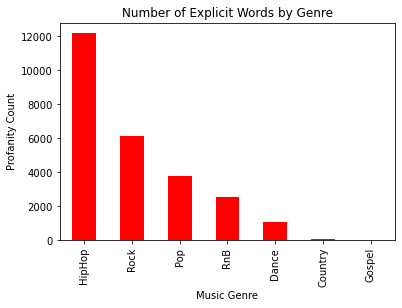

In [56]:
profanity_counts.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="Profanity Count",
                                legend=False,
                                use_index=True,
                                color='red')
plt.title("Number of Explicit Words by Genre")
plt.show()

In [57]:
pop_god = pop['Lyric'].str.contains(' god | dios | deus ').sum()
hiphop_god = hiphop['Lyric'].str.contains(' god | dios | deus ').sum()
rock_god = rock['Lyric'].str.contains(' god | dios | deus ').sum()
gospel_god = gospel['Lyric'].str.contains(' god | dios | deus ').sum()
RnB_god = RnB['Lyric'].str.contains(' god | dios | deus ').sum()
country_god = country['Lyric'].str.contains(' god | dios | deus ').sum()
dance_god = dance['Lyric'].str.contains(' god | dios | deus ').sum()

In [58]:
god_counts = pd.DataFrame(
    {"Genre":["Pop", "HipHop", "Rock", "Gospel", "RnB", "Country", "Dance"],
        "Count":[pop_god, hiphop_god, rock_god, gospel_god, RnB_god, country_god, dance_god]
     })
god_counts.set_index("Genre",drop=True,inplace=True)
god_counts = god_counts.sort_values(by="Count", ascending=False)
god_counts

,Count
Genre,
Rock,1312
Gospel,1050
HipHop,913
Pop,692
RnB,172
Dance,159
Country,138


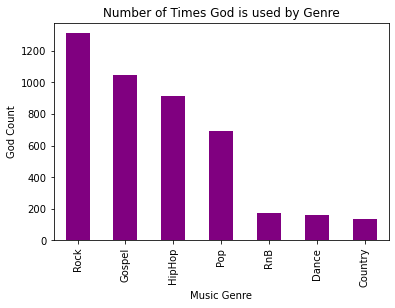

In [59]:
god_counts.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="God Count",
                                legend=False,
                                use_index=True,
                                color='purple')
plt.title("Number of Times God is used by Genre")
plt.show()

In [60]:
profanity_vs_god = pd.merge(profanity_counts, god_counts, on='Genre')
profanity_vs_god.rename(columns = {'Count_x':'Profanity_Count', 'Count_y':'God_Count'}, inplace = True)
profanity_vs_god

,Profanity_Count,God_Count
Genre,,
HipHop,12178,913
Rock,6123,1312
Pop,3766,692
RnB,2521,172
Dance,1061,159
Country,82,138
Gospel,28,1050


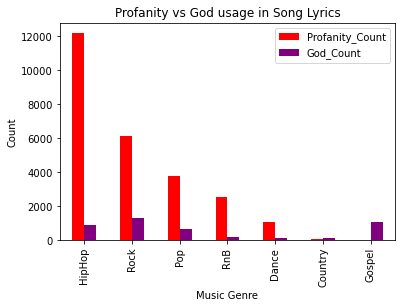

In [61]:
profanity_vs_god.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="Count",
                                use_index=True,
                                color=['red', 'purple'])
plt.title("Profanity vs God usage in Song Lyrics")
plt.show()

In [62]:
new_df = combined_data.drop(columns=['Song Title', 'Lyric'], errors='ignore')
new_df
new_df = new_df.groupby('Artist').agg({
    'Genres': 'first',
    'Popularity': 'first',
    'language': 'first',
})
new_df = new_df.sort_values(by='Popularity', ascending = False)
new_df.head(10)

,Genres,Popularity,language
Artist,,,
Beyoncé,Pop; R&B; Black Music,205.5,en
Sia,Trip-Hop; Pop; Romântico,135.1,en
Anitta,Pop; Dance; Funk Carioca,119.6,es
Adele,Soul Music; Pop; R&B,119.3,en
Eminem,Hip Hop; Rap,114.9,en
Ed Sheeran,Indie; Romântico; Pop/Rock,114.2,en
Harpa Cristã,Gospel/Religioso,108.0,pt
Coldplay,Pop/Rock; Piano Rock; Soft Rock,107.4,en
Pink,Pop/Rock; Pop,84.4,en


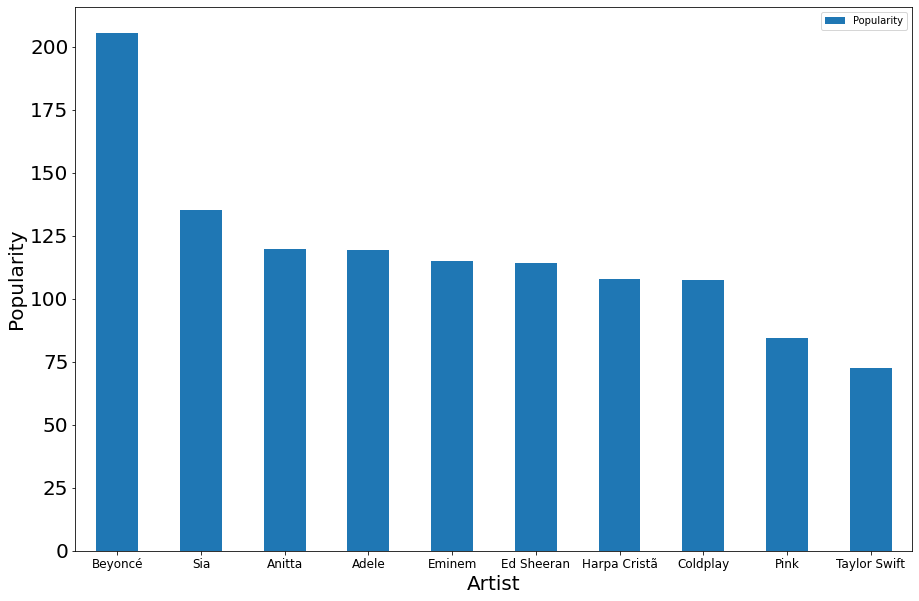

In [63]:
new_df.head(10).plot(kind = 'bar', x = None, y = 'Popularity', figsize = (15,10))
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Popularity', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 20)
plt.show()

In [64]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [65]:
#This url is the page for the top 50 songs
url = 'https://bestsellingalbums.org/overall/'

album_data = {
    'rank' : [],
    'title' : [],
    'artist' : [],
    'sales' : []
}

browser.visit(url)

In [66]:
# variables for csv
header = ['Rank', 'Album', 'Artist', 'Sales']
data = []

# HTML object
html = browser.html
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')
# Retrieve all elements that contain book information
albums = soup.find_all('div', class_='album_card')
# Iterate through each book
for album in albums:

    try:
        rank = album.find('div', class_='rank').text
        title = album.find('div', class_='album').text
        artist = album.find('div', class_='artist').text
        sales = album.find('div', class_='sales').text
        
        #edit sales text to input as an integer instead of object
        sales = sales[7:]
        sales = int(sales.replace(',', ''))
        
        data.append([rank, title, artist, sales])

    except:
        print("Scraping Complete")

        try:
            browser.links.find_by_partial_text('next').click()
        except:
                print("Scraping Complete")
        
#write CSV file
with open('top50_best_selling_albums.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

browser.quit()


In [67]:
# Load in csv
bestsellers_df = pd.read_csv("top50_best_selling_albums.csv")
bestsellers_df.head(50)

,Rank,Album,Artist,Sales
0,1,THRILLER,MICHAEL JACKSON,66000000
1,2,BACK IN BLACK,AC/DC,50000000
2,3,DARK SIDE OF THE MOON,PINK FLOYD,50000000
3,4,THE BODYGUARD (SOUNDTRACK),WHITNEY HOUSTON,45000000
4,5,BAD,MICHAEL JACKSON,45000000
5,6,BAT OUT OF HELL,MEAT LOAF,43000000
6,7,HOTEL CALIFORNIA,EAGLES,42000000
7,8,THEIR GREATEST HITS 1971-1975,EAGLES,41197000
8,9,MILLENNIUM,BACKSTREET BOYS,40000000
9,10,COME ON OVER,SHANIA TWAIN,40000000


In [68]:
new_df.index = new_df.index.str.upper()
new_df.head(10)

,Genres,Popularity,language
Artist,,,
BEYONCÉ,Pop; R&B; Black Music,205.5,en
SIA,Trip-Hop; Pop; Romântico,135.1,en
ANITTA,Pop; Dance; Funk Carioca,119.6,es
ADELE,Soul Music; Pop; R&B,119.3,en
EMINEM,Hip Hop; Rap,114.9,en
ED SHEERAN,Indie; Romântico; Pop/Rock,114.2,en
HARPA CRISTÃ,Gospel/Religioso,108.0,pt
COLDPLAY,Pop/Rock; Piano Rock; Soft Rock,107.4,en
PINK,Pop/Rock; Pop,84.4,en


In [69]:
bestsellers_df = bestsellers_df.groupby('Artist')['Sales'].sum().reset_index()
bestsellers_df.head(20).sort_values(by='Sales', ascending = False)

,Artist,Sales
13,EAGLES,83197000
10,CELINE DION,62000000
1,AC/DC,50000000
17,FLEETWOOD MAC,40000000
5,BACKSTREET BOYS,40000000
6,BEE GEES,40000000
4,ALANIS MORISSETTE,33000000
15,EMINEM,32000000
0,ABBA,32000000
14,ELTON JOHN,31000000


In [70]:
merged_df = pd.merge(new_df, bestsellers_df, left_index=True, right_on='Artist', how='inner')
merged_df.sort_values(by='Popularity', ascending = False)
merged_df.head(50)

,Genres,Popularity,language,Artist,Sales
3,Soul Music; Pop; R&B,119.3,en,ADELE,30000000
15,Hip Hop; Rap,114.9,en,EMINEM,32000000
38,Rock; Psicodelia; Pop/Rock,64.2,en,THE BEATLES,64000000
31,Soft Rock; Romântico; Pop/Rock,51.9,en,PHIL COLLINS,25000000
14,Soft Rock; Romântico; Pop/Rock,44.7,en,ELTON JOHN,31000000
32,Progressivo; Rock; Psicodelia,42.6,en,PINK FLOYD,83000000
29,Rock; Grunge; Rock Alternativo,40.3,en,NIRVANA,30000000
34,Rock; Hard Rock; Progressivo,39.7,en,QUEEN,25000000
39,Rock; Pós-Punk; Pop/Rock,37.4,en,U2,25000000
28,Pop; R&B; Black Music,36.0,en,MICHAEL JACKSON,138000000


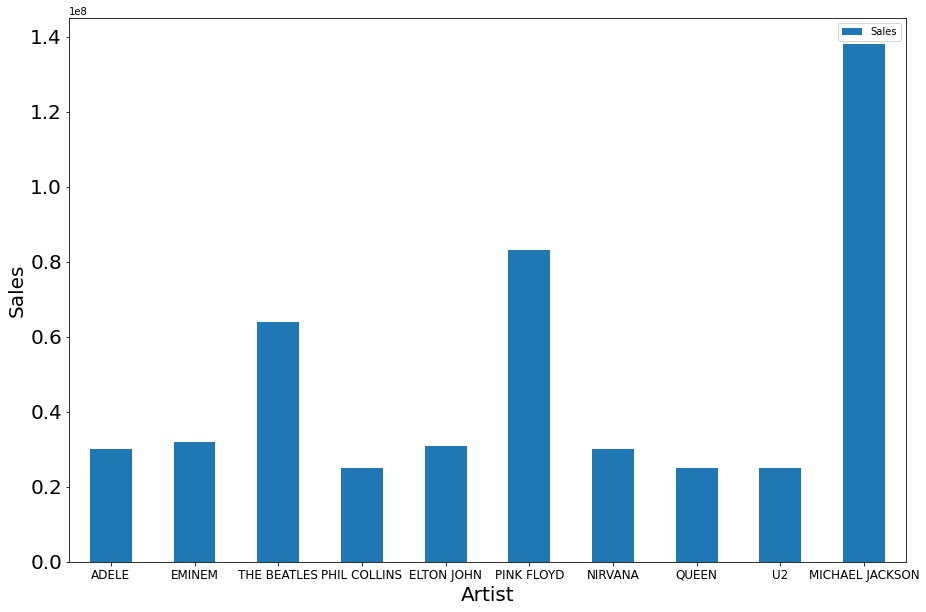

In [71]:
merged_df.head(10).plot(kind = 'bar', x = 'Artist', y = 'Sales', figsize = (15,10))
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 20)
plt.show()

In [72]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Declare the database
db = client.songs_db

# Declare the collection
songs = db.songs
profanity_vs_god_collection = db.profanity_vs_god


combined_data.reset_index(inplace=True)
combined_data_dict = combined_data.to_dict("records")

profanity_vs_god.reset_index(inplace=True)
profanity_vs_god_dict = profanity_vs_god.to_dict("records")
# Insert collection
profanity_vs_god_collection.insert_many(profanity_vs_god_dict)
songs.insert_many(combined_data_dict)